In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
from scipy.ndimage import gaussian_filter1d
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal
import pickle
from matplotlib.colors import Normalize

In [2]:
file = "/oak/stanford/groups/trc/data/berger/registration/lobe_masks/JRC2018f_lobe_mask.nii"
brain = nib.load(file).get_fdata()

In [4]:
brain.shape

(1652, 768, 479)

In [76]:
file = "/oak/stanford/groups/trc/data/berger/registration/lobe_masks/JRC2018f_lobe_mask.nii"
mask = ants.image_read(file)
mask

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1652, 768, 479)
	 Spacing    : (0.38, 0.38, 0.38)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

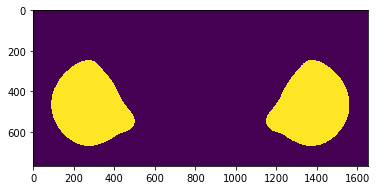

In [83]:
plt.imshow(mask[:,:,300].T)

In [64]:
atlas_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine.nii"
atlas = np.asarray(nib.load(atlas_path).get_fdata().squeeze(), dtype='float32')
atlas = ants.from_numpy(atlas)
atlas.set_spacing((.38,.38,.38))
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_20220531_test.nii"
ants.image_write(atlas, save_file)
#nib.Nifti1Image(atlas[::-1,:,:], np.eye(4)).to_filename(save_file)

In [71]:
save_file
atlas = ants.image_read(save_file)
atlas

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1652, 768, 479)
	 Spacing    : (0.38, 0.38, 0.38)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

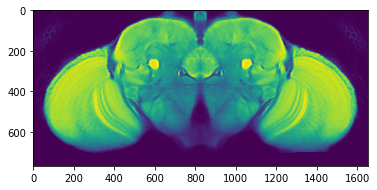

In [85]:
plt.imshow(atlas[:,:,300].T)

In [73]:
jfrc_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
jfrc = ants.image_read(jfrc_path)
jfrc

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1652, 768, 479)
	 Spacing    : (0.38, 0.38, 0.38)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

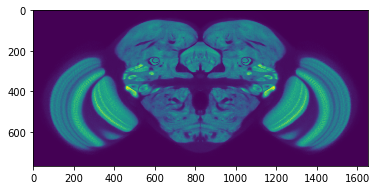

In [84]:
plt.imshow(jfrc[:,:,300].T)

In [65]:
ants.image_read(save_file)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (1652, 768, 479)
	 Spacing    : (0.38, 0.38, 0.38)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [45]:
nib.load(atlas_path).get_qform()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [52]:
nib.load(atlas_path).get_xyzt_units()

AttributeError: 'Nifti1Image' object has no attribute 'get_xyzt_units'

In [40]:
dir(nib.load(file).header)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chk_bitpix',
 '_chk_datatype',
 '_chk_magic',
 '_chk_offset',
 '_chk_pixdims',
 '_chk_qfac',
 '_chk_qform_code',
 '_chk_sform_code',
 '_chk_sizeof_hdr',
 '_chk_xform_code',
 '_clean_after_mapping',
 '_data_type_codes',
 '_field_recoders',
 '_get_checks',
 '_slice_time_order',
 '_structarr',
 'as_analyze_map',
 'as_byteswapped',
 'binaryblock',
 'check_fix',
 'copy',
 'data_from_fileobj',
 'data_to_fileobj',
 'default_structarr',
 'default_x_flip',
 'diagnose_binaryblock',
 'endianness',
 'extensions',
 'exts_klass',
 'from_fileobj',
 'from_header',
 'get',
 'get_base_affine',

In [33]:
atlas = np.asarray(nib.load(atlas_path).get_data().squeeze(), dtype='float32')
atlas.shape

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


(1652, 768, 479)

In [ ]:
atlas = ants.from_numpy(atlas)
atlas.set_spacing((.38,.38,.38))
nib.Nifti1Image(moco.numpy(), np.eye(4)).to_filename(save_file)


In [ ]:
new_affine = np.diag(new_res + [1])
new_img = nib.Nifti1Image(np.zeros(newshape),
    affine = new_affine)

In [20]:
atlas.shape

(1652, 768, 479)

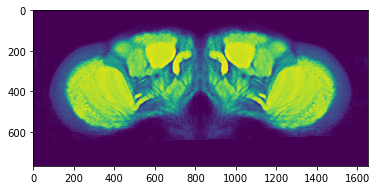

In [31]:
plt.imshow(atlas[:,:,400].T)

In [12]:
jfrc_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/JRC2018_FEMALE_38um_iso_16bit.nii"
jfrc = nib.load(jfrc_path).get_fdata()

In [14]:
jfrc.shape

(1652, 768, 479, 1)

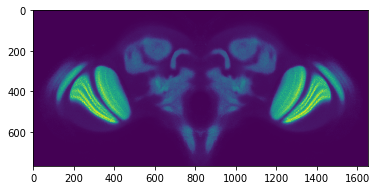

In [30]:
plt.imshow(jfrc[:,:,400,0].T)